# Sequence Alignment Visualization

We visualize sequence Alignment  by color coding each residue and gaps in the aligned sequence FASTA file.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter

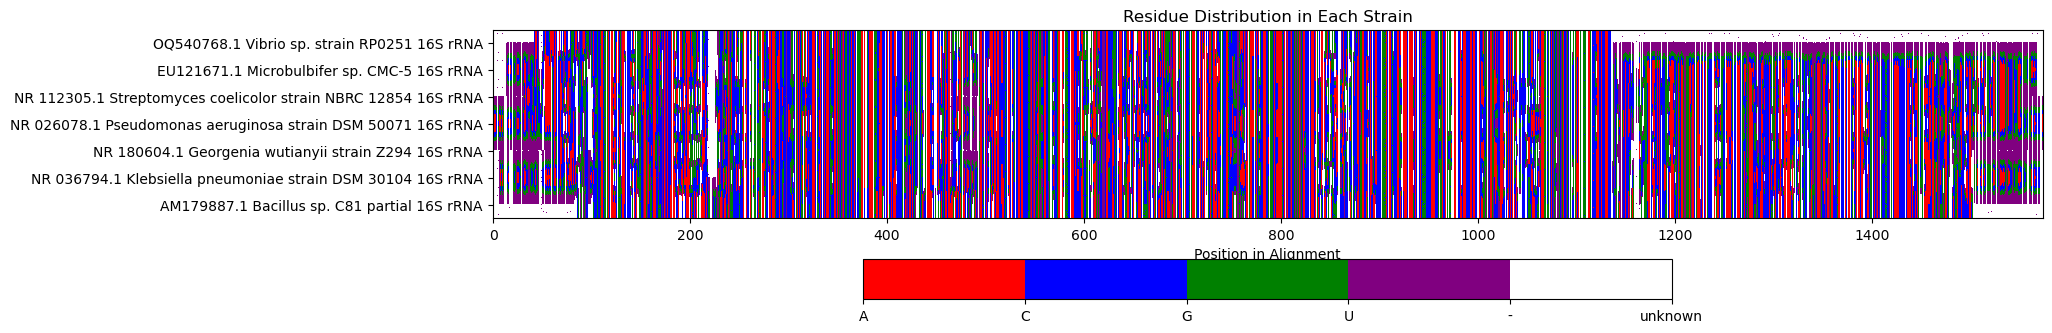

In [8]:
def fasta_parser_with_names(filename):
    """A simple parser for FASTA files that also extracts sequence names."""
    sequences = []
    names = []
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith('>'):
                names.append(line[1:].strip())
            else:
                sequences.append(line.strip())
    return names, sequences

# Load the sequences and names from the FASTA file
names, sequences = fasta_parser_with_names("16RNAMSA.fasta")

# Define colors for each residue
color_dict = {
    'A': 'red',
    'C': 'blue',
    'G': 'green',
    'U': 'purple',
    '-': 'white'
}

# Define a mapping from residues to integers
residue_to_int = {residue: i for i, residue in enumerate(color_dict.keys())}
residue_to_int['unknown'] = len(residue_to_int)

# Map each residue to an integer, using 'unknown' for unknown residues
int_sequences = [[residue_to_int.get(residue, residue_to_int['unknown']) for residue in seq] for seq in sequences]

# Generate a figure and axes
fig, ax = plt.subplots(figsize=(20, len(names) * 0.5))

# Generate a color bar for each residue
cmap = mcolors.ListedColormap(list(color_dict.values()))
cbar = ax.imshow(int_sequences, aspect='auto', cmap=cmap)

# Set the plot title and labels
ax.set_title('Residue Distribution in Each Strain')
ax.set_yticks(range(len(names)))
ax.set_yticklabels(names)
ax.set_xlabel('Position in Alignment')

# Create a color bar legend
cbar = plt.colorbar(cbar, ax=ax, ticks=range(len(residue_to_int)), orientation='horizontal')
cbar.ax.set_xticklabels(list(residue_to_int.keys()))  # horizontally oriented colorbar

# Show the plot
plt.show()


# CONSERVATION PLOT


To generate a conservation plot, we calculate the conservation score for each position in the alignment. One common way to do this is by calculating the "Shannon entropy", which measures the uncertainty (or conversely, the information content) in a set of data.

In [4]:
pip install biopython numpy matplotlib



     ---------------------------------------- 2.7/2.7 MB 3.8 MB/s eta 0:00:00


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import AlignIO

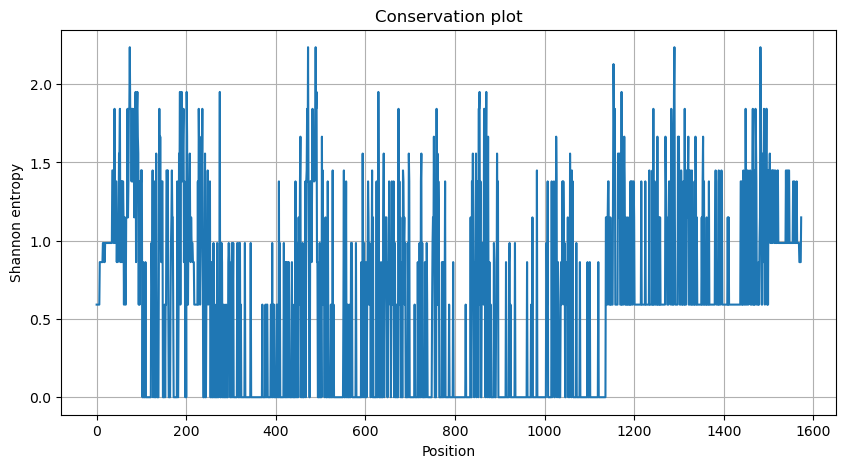

In [6]:
# Function to calculate shannon entropy
def shannon_entropy(list_input):
    unique_base = set(list_input)
    M = len(list_input)
    entropy_value = []
    # for each unique base calculate the shannon entropy
    for base in unique_base:
        n_i = list_input.count(base)  # count of i
        P_i = n_i / float(M)  # n_i(Number of residues of type i) / M(Number of all residues)
        if P_i > 0:  # to avoid log2(0)
            entropy_i = P_i * (np.log2(P_i))
            entropy_value.append(entropy_i)
    sh_entropy = -(sum(entropy_value))
    return sh_entropy

# Load alignment
alignment = AlignIO.read('16RNAMSA.fasta', 'fasta')

# Calculate Shannon entropy for each position
entropy_list = []
for column in range(len(alignment[0])):
    column_residues = [record.seq[column] for record in alignment]
    entropy_list.append(shannon_entropy(column_residues))

# Plot the Shannon entropy
plt.figure(figsize=(10,5))
plt.plot(entropy_list)
plt.title('Conservation plot')
plt.xlabel('Position')
plt.ylabel('Shannon entropy')
plt.grid(True)
plt.show()

In [9]:
import matplotlib.pyplot as plt
from collections import Counter
from math import log2

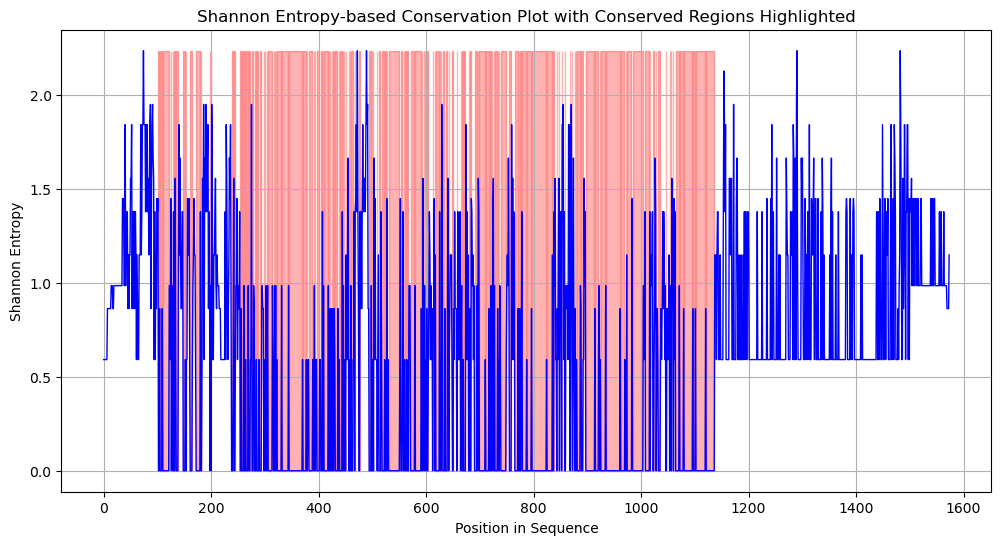

In [10]:
# Function to parse FASTA file
def parse_fasta(file_path):
    with open(file_path, 'r') as file:
        sequences = []
        sequence = ""
        for line in file:
            if line.startswith(">"):
                if sequence != "":
                    sequences.append(sequence)
                    sequence = ""
            else:
                sequence += line.strip()
        # Append the last sequence
        if sequence != "":
            sequences.append(sequence)
    return sequences

# Calculate the Shannon entropy for each position
def shannon_entropy(position):
    count = Counter(position)
    probabilities = [count[nucleotide]/len(position) for nucleotide in count]
    entropy = -sum([p*log2(p) if p > 0 else 0 for p in probabilities])
    return entropy

# Parse the fasta file
sequences = parse_fasta("16RNAMSA.fasta")

# Transpose the sequences to iterate over positions instead of sequences
positions = list(map(list, zip(*sequences)))

# Calculate the Shannon entropy for each position
entropies = [shannon_entropy(pos) for pos in positions]

# Set the Shannon entropy threshold
threshold = 0.5

# Initialize variables to keep track of the start and end of each conserved region
start = None
conserved_regions = []

# Iterate over the Shannon entropy values
for i, entropy in enumerate(entropies):
    # Check if the entropy is below the threshold
    if entropy < threshold:
        # If this is the start of a conserved region, remember the start position
        if start is None:
            start = i
    # If the entropy is above the threshold and we were in a conserved region, this is the end of the region
    elif start is not None:
        # Remember the end of the conserved region
        conserved_regions.append((start, i))
        # Reset the start position
        start = None

# If we ended in a conserved region, remember the end of the region
if start is not None:
    conserved_regions.append((start, len(entropies)))

# Generate the Shannon entropy plot
plt.figure(figsize=(12, 6))
plt.plot(entropies, color='blue', linewidth=1)

# Highlight the conserved regions
for start, end in conserved_regions:
    plt.fill_between(range(start, end), [0]*len(range(start, end)), [max(entropies)]*len(range(start, end)), color='red', alpha=0.3)

plt.title("Shannon Entropy-based Conservation Plot with Conserved Regions Highlighted")
plt.xlabel("Position in Sequence")
plt.ylabel("Shannon Entropy")
plt.grid(True)
plt.show()

# Hamming Distances

We calculate the Hamming distances between the aligned sequences below.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import AlignIO

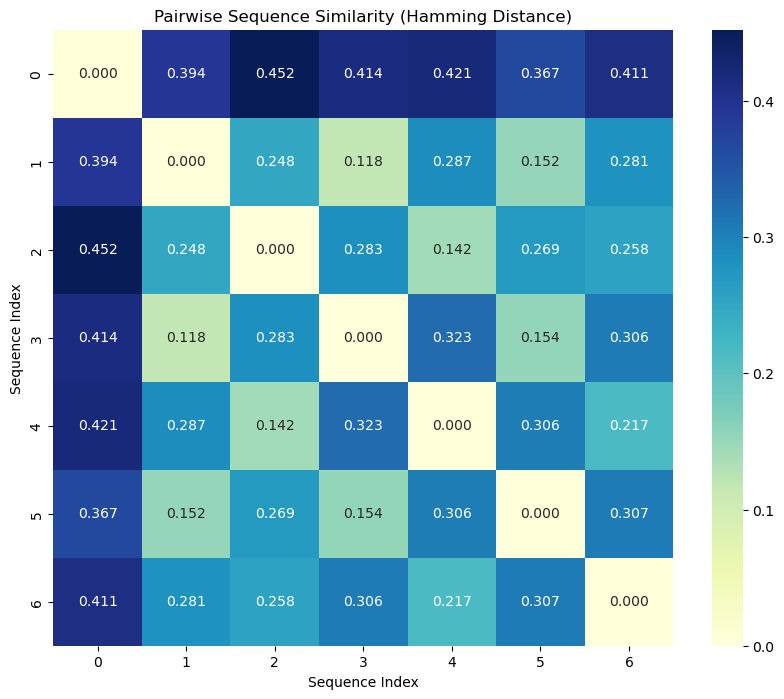

The most similar sequences are at index (1, 3) with a Hamming distance of 0.118


In [18]:
# Function to calculate normalized Hamming distance
def hamming_distance(s1, s2):
    return sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2)) / len(s1)

# Parse the fasta file
alignment = AlignIO.read("16RNAMSA.fasta", "fasta")

# Extract the sequences from the alignment
sequences = [str(record.seq) for record in alignment]

# Initialize a matrix to hold the distances
distance_matrix = np.zeros((len(sequences), len(sequences)))

# Calculate Hamming distances for each pair of sequences
for i in range(len(sequences)):
    for j in range(len(sequences)):
        distance_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

# Create a heatmap of the distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Pairwise Sequence Similarity (Hamming Distance)")
plt.xlabel("Sequence Index")
plt.ylabel("Sequence Index")
plt.show()

# Initialize variables to keep track of the minimum distance and the indices
min_distance = np.inf
min_indices = (None, None)

# Iterate over the upper triangle of the distance matrix
for i in range(len(sequences)):
    for j in range(i + 1, len(sequences)):
        # If this distance is less than the current minimum, update the minimum and the indices
        if distance_matrix[i, j] < min_distance:
            min_distance = distance_matrix[i, j]
            min_indices = (i, j)

# Display the indices of the most similar sequences and their distance
print(f"The most similar sequences are at index {min_indices} with a Hamming distance of {min_distance:.3f}")

In [24]:
# Extract the second and fourth sequences
seq2 = sequences[1]  # 0-indexed
seq4 = sequences[3]  # 0-indexed

# Calculate the percentage similarity
similarity = sum(ch1 == ch2 for ch1, ch2 in zip(seq2, seq4)) / len(seq2) * 100

print(f"The percentage similarity between the second and fourth sequences is {similarity:.2f}%")


The percentage similarity between the second and fourth sequences is 88.25%


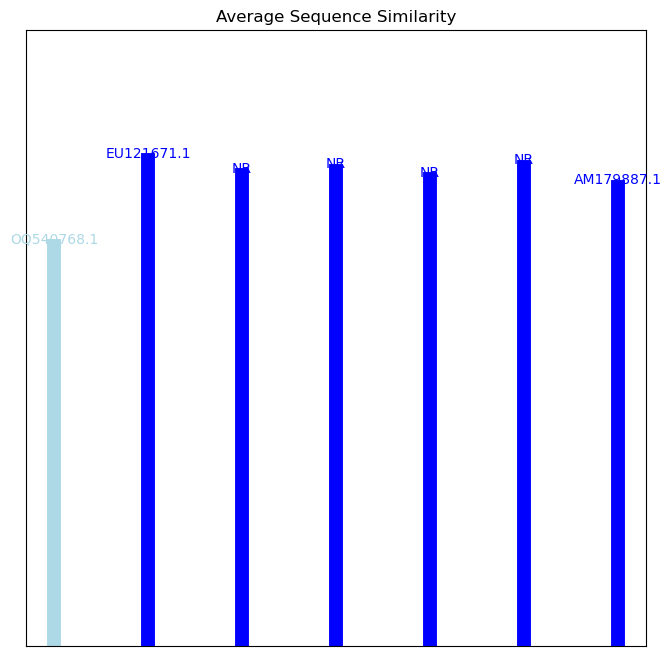

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import AlignIO

# Function to calculate normalized Hamming distance
def hamming_distance(s1, s2):
    return sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2)) / len(s1)

# Parse the fasta file
alignment = AlignIO.read("16RNAMSA.fasta", "fasta")

# Extract the sequences from the alignment
sequences = [str(record.seq) for record in alignment]
sequence_names = [record.id for record in alignment]

# Initialize a matrix to hold the distances
distance_matrix = np.zeros((len(sequences), len(sequences)))

# Calculate Hamming distances for each pair of sequences
for i in range(len(sequences)):
    for j in range(len(sequences)):
        distance_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

# Calculate the average similarity for each sequence
average_similarities = 1 - distance_matrix.mean(axis=0)

# Create a new figure
plt.figure(figsize=(8, 8))

# Calculate the angle of each bar
angles = np.linspace(0, 2 * np.pi, len(average_similarities), endpoint=False).tolist()

# Plot each bar
for angle, similarity, sequence_name in zip(angles, average_similarities, sequence_names):
    # Color the bar based on the similarity score
    if similarity > 0.7:
        color = "blue"
    elif similarity > 0.4:
        color = "lightblue"
    else:
        color = "red"

    # Draw the bar
    plt.plot([angle, angle], [0, similarity], color=color, linewidth=10)

    # Add the sequence name at the end of the bar
    plt.text(angle, similarity, sequence_name, color=color, ha="center", va="bottom")

# Set the limit and labels of the plot
plt.ylim(0, 1)
plt.title("Average Sequence Similarity")
plt.xlabel("Sequence")
plt.ylabel("Similarity")

# Hide the polar coordinates
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

# Show the plot
plt.show()
